### Problem Set 6-2

<b>Arnie Larson<br/>
3/13/2023<br/>
ME 525 - Acoustics<br/></b>

Notes on the final problem set part 2.

This problem has 2 parts that do some propagation modeling.

I present my results first and you can see all the codes below


### Parts A & B - Setup

In this first part I look at parts A and B together.  The goal is to create a simple model (Lloyd's Mirror) of the propagation of vessel noise in a deep ocean undergoing a noise test, or acoustic source level test.

The model assumes that a point source is 2m below the surface, and that hydrophones are places at depths \[27m, 58m, 100m\] below the surface with a horizontal distance of $d = 100m$.  

I model the pressure using a propagaion model with SL = 160 dB re $1\mu Pa^2$ uniformly at each $f_c$, with:

$P = A\big{(} \frac{e^{( j k r_1 )}}{r_1} - \frac{e^{( j k r_2 )}}{r_2} \big{)} \; \; \; A \approx 141\; [Pa\;m]\; \; r_1 = \sqrt{d^2 + (h - z)^2} \; \; r_1 = \sqrt{d^2 + (h + z)^2}$

$RL = 10 log_{10}(\frac{1}{2}P^2 / P_{ref}^2)$

### Discussion

We look at the 1/3 octave frequencies between $100 Hz$ and $10kHz$ with a uniform (broadband) source level of 160 dB re $1\mu Pa^2$.  

We find that at these freqeuncies we will get variations in the RL at the different hydrophone depths.   The RL are all close to 40 dB below SL, however, they vary by over 10dB, with constructive interference leading to propagation loss lower than the +40 dB that would be predicted from spherical spreading and destructive interference leading to propagation losses greater than spherical spreading.



In [24]:
print_table()

Results of RL modeling at 3 hydrophone locations
RL in dB re 1 uPa^2


| Freq [Hz]	k [1/m]	h1 = 27 [m]	h2 = 58 [m]	h3 = 100 [m]	|
| 100.0		0.4	112.43 [dB]	116.98 [dB]	117.95 [dB]	|
| 126.0		0.5	114.39 [dB]	118.83 [dB]	119.65 [dB]	|
| 158.7		0.7	116.34 [dB]	120.59 [dB]	121.16 [dB]	|
| 200.0		0.8	118.24 [dB]	122.20 [dB]	122.35 [dB]	|
| 252.0		1.1	120.08 [dB]	123.57 [dB]	122.98 [dB]	|
| 317.5		1.3	121.82 [dB]	124.52 [dB]	122.59 [dB]	|
| 400.0		1.7	123.40 [dB]	124.71 [dB]	119.88 [dB]	|
| 504.0		2.1	124.71 [dB]	123.39 [dB]	106.87 [dB]	|
| 635.0		2.7	125.57 [dB]	117.93 [dB]	118.29 [dB]	|
| 800.0		3.4	125.58 [dB]	111.57 [dB]	123.01 [dB]	|
| 1007.9	4.2	123.86 [dB]	123.74 [dB]	112.77 [dB]	|
| 1269.9	5.3	116.85 [dB]	122.94 [dB]	122.52 [dB]	|
| 1600.0	6.7	116.46 [dB]	117.37 [dB]	97.63 [dB]	|
| 2015.9	8.4	125.29 [dB]	122.98 [dB]	118.36 [dB]	|
| 2539.8	10.6	122.27 [dB]	124.30 [dB]	118.80 [dB]	|
| 3200.0	13.4	121.93 [dB]	122.52 [dB]	103.52 [dB]	|
| 4031.7	16.9	121.02 [dB]	124.27 [dB]	122.56 [dB]	|
|

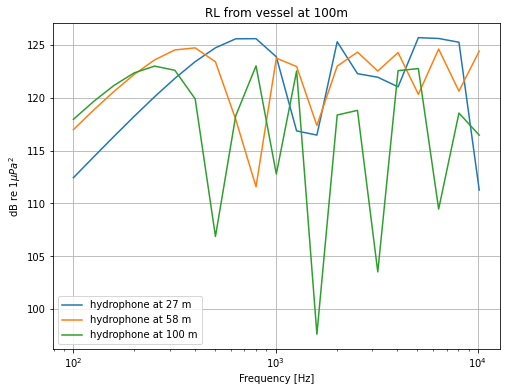

In [25]:
plot_rl()

### Part C - Investigating noise from shipping lanes

In the problem we make some assumptions, first, if there are 8 ships transiting a lane in a day, then a point will see a ship go by about once every 3 hours, or $t=10,800 s$.

If we assume ships have a constant velocity, $v \approx 5 m/s$ then ships are spaced at about $d = t*v \approx 54 km$

The goal of this problem is to estimate sound at a distance of say 10 km from a shipping lane.  We are given an estimate of broadband noise of 180 dB at 20 Hz, 165 dB at 63 Hz, and 150 dB at 200 Hz.  We are to use incoherent sums to estimate the noise level at a distance of 10km from the shipping lane do to this setup.

To do analysis of propagation in the ocean, many more modes than are available in the mode worksheet would be needed.  (One thing I'm not super clear about)  I'm also not fully confident in my utilization of the worksheet, as the TL for the higher frequencies was often equal or less than lower frequencies, in spite of the higher attenuation coefficient.

Attenuation is supposed to be handled as imaginary part of the wavenumber in the sediment.  (And I believe attenuation in the water is ignored)

Basically the model approaches cylindrical spreading when the attenuation or transmission to the sediment goes to zero.  This can be seen by increasing the impedance by a couple orders of magnitude in the work sheet, and these frequencies converge to very near cylindrical spreading loss.

In my solution I choose a depth of 200 (basically just so there is some variation in the PL) and tabulate PL vs distances so that I can calculate some SPL's given the geometrical setup described below.  Again, I don't have confidence that I utilized the mode work sheet correctly.

Geometry

- Let the shipping lane be along $x$ axis, this is the point where $y=0$.
- Let the hydrophone be at a the point $y=10km$, with $x=0$.
- If we want to take 15 measurements over 3 hours, that's about 1 every 12 minutes, and a ship will move about 3.6km in that time
- I set up my simulation with 8 ships spread out and calculate RL's for 15 points, 12 minutes apart

Notes and Discussion

- We're not concerning ourselves too much with depth, source or receiver.  
- We're primarily concerned with estimating the propagation loss, s.t RL = SL - PL
- There would be a doppler shift but in water, this shift should be relatively insignificant and can ignore
- As noted, in deep water with a "hard" boundary, the sum of modes does appear to converge close to the cylindrical case, and so the attenuation becomes the dominant addition to propagation loss.
- Also note, I'm really not 100% sure how this virtual mode worksheet is setup.  

I find that there is likely broadband noise much higher than ambient noises we have looked at in the class.  And that even at 10km, the cylindrical spreading only knocks a little more than 40dB off of the nearest ship which seems to dominate the incoherent sum.  This is seen in the plot below with the 20Hz source with SL of 180 dB.


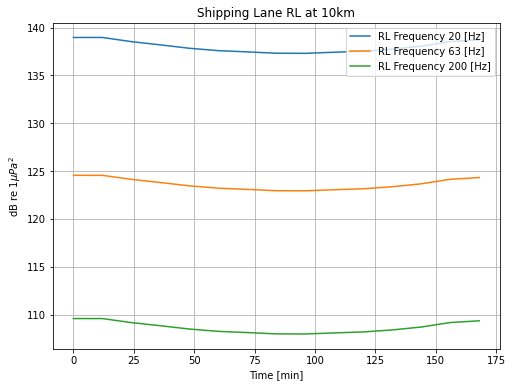

In [91]:
plot_r2()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy import signal
import scipy.io as io
import os

In [94]:
#==============================================================================
#
#  Lloyds Mirror Propagaion from vessel (in deep water)
#  Calculate fc for 1/3 octave bands
#  Set up problem and solve for P, RL at hydrophone depths
#
#==============================================================================

# generate [n,fmin, fx, fmax] tuples, effectively in a 16 x 4 
# 1/3 octave bands, starting at 100 Hz
# each band increases by 2**1/3

fc = 100
f = [fc]
print("0, first 1/3 octave band: {:.3f}".format(fc))
for n in range(1,21):
    fc*=np.power(2,1/3)
    f.append(fc)
    print("{}, next 1/3 octave band: {:.3f}".format(n, fc))


0, first 1/3 octave band: 100.000
1, next 1/3 octave band: 125.992
2, next 1/3 octave band: 158.740
3, next 1/3 octave band: 200.000
4, next 1/3 octave band: 251.984
5, next 1/3 octave band: 317.480
6, next 1/3 octave band: 400.000
7, next 1/3 octave band: 503.968
8, next 1/3 octave band: 634.960
9, next 1/3 octave band: 800.000
10, next 1/3 octave band: 1007.937
11, next 1/3 octave band: 1269.921
12, next 1/3 octave band: 1600.000
13, next 1/3 octave band: 2015.874
14, next 1/3 octave band: 2539.842
15, next 1/3 octave band: 3200.000
16, next 1/3 octave band: 4031.747
17, next 1/3 octave band: 5079.683
18, next 1/3 octave band: 6400.000
19, next 1/3 octave band: 8063.495
20, next 1/3 octave band: 10159.367


In [20]:
# What is value of A in spherical point source model?
# 160 db = 20 log (Arms / Pref)
# Now do first calculation
# A    = 141.4 Pa m
# rho = 1025 kg/m^3
# c   = 1500 m/s
# k = 2 pi / lambda = 2 pi f / c
c = 1500
k = np.array(f)*2*np.pi/c 
A = 141.42                  # Constant for pressure SL model
d = 100                     # distance (along x axis)
h = np.array([27,58,100])   # depth of hydrophone
z = 2                       # depth of source

In [21]:
# caluclate pressure and RL at hydrophone locations
# factor of 1/2 in RL is to account for RMS scaling of pressure
P = np.zeros((21,3), dtype=np.csingle)
for i in range(h.shape[0]):
    r1 = np.sqrt(d**2 + (z-h[i])**2)
    r2 = np.sqrt(d**2 + (-z-h[i])**2)
    P[:,i] = A*(np.exp(1j * k * r1)/r1 - np.exp(1j * k * r2)/r2 ) 
RL = 10 * np.log10(np.abs(0.5*P*np.conjugate(P))/1e-12)

In [22]:
# write to a table format (markdown in Jupyter notebooks doesn't seem to have table formatting)
def print_table():
    print("Results of RL modeling at 3 hydrophone locations")
    print("RL in dB re 1 uPa^2\n\n")
    print("| Freq [Hz]\tk [1/m]\th1 = {} [m]\th2 = {} [m]\th3 = {} [m]\t|".format(h[0], h[1], h[2]))
    for i in range(RL.shape[0]):
        if i <= 9:
            print("| {:.1f}\t\t{:.1f}\t{:.2f} [dB]\t{:.2f} [dB]\t{:.2f} [dB]\t|".format(
                f[i], k[i], RL[i,0], RL[i,1], RL[i,2]
            ))
        else:
            print("| {:.1f}\t{:.1f}\t{:.2f} [dB]\t{:.2f} [dB]\t{:.2f} [dB]\t|".format(
                f[i], k[i], RL[i,0], RL[i,1], RL[i,2]
            ))
    

In [23]:
def plot_rl():
    plt.subplots(figsize=(8,6))
    plt.semilogx(f, RL[:,0], label='hydrophone at 27 m')
    plt.semilogx(f, RL[:,1], label='hydrophone at 58 m')
    plt.semilogx(f, RL[:,2], label='hydrophone at 100 m')
    plt.xlabel("Frequency [Hz]"); plt.ylabel("dB re $ 1 \mu Pa^2$")
    plt.title("RL from vessel at 100m"); plt.grid(); plt.legend();
    plt.show()

In [22]:
#==============================================================================
#
#  Investigating Noise from Shipping Lanes
#
#==============================================================================

# Geometry setup, let's just start with 8 ships... 55km apart..
# x is initial ship locations [in km], y is hydrophone location [km]
# dx is the set of 15 ship deltas from x0..
# 

x=np.array([x for x in range(-4,4)])*55
y=10

In [73]:
s = set()
for i in range(0,15):
    dx=i*3.6
    d=np.sqrt((x+dx)**2 + y**2)
    for val in d:
        s.add(np.floor(val))

In [48]:
# Note - I ennumerated the set of ranges as integers to put into the mode worksheet
    

In [51]:
# Load range data generated from mode worksheet
# R [m] PL [20Hz] PL [63Hz] PL [200 Hz] PL [20Hz] PL [63Hz] PL [200 Hz]

range_data = "range_data.txt"
rd=np.genfromtxt(os.path.join(os.getcwd(),range_data), dtype=np.float32)

In [81]:
#==============================================================================
#
#  This is our mapping from distance+frequency to TL
#  range [m], TL [20Hz], TL[63Hz], TL[200Hz]
#
#==============================================================================

ranges = {}
for r in range(rd.shape[0]):
  ranges[int(rd[r,0])] = [rd[r,4], rd[r,5], rd[r,6]] 

In [82]:
# our 15 time steps, for plotting, from 0 minutes to 168 minutes 
t = np.linspace(0,168,15)

In [88]:
#==============================================================================
#
#  Calculations of RL from incoherent sum for given frequency/ time
#  Frequncies: 20,  63,  200 [Hz]
#  SPLs:       180, 165, 150 [dB]
#  RL = SL + TL
#  RL = 10 log (sum(P^2) / Pref^2)
#
#==============================================================================

SL = [180, 165, 150]
RL = np.zeros((15,3))
Pref2 = 1e-12
for f in range(3):
    for i in range(0,15):
        dx=i*3.6
        d=np.sqrt((x+dx)**2 + y**2)   # this gives me a vector of 8 distances 
        P2=0.   # this is the incoherent sum, add up all the P^2 and then take the RL in dB
        # this loop maps from the calculated model ranges [km] to the mode worksheet [m]
        for v in [int(x)*1000 for x in d]:
            # P^2 = Pref^2 * 10^ (RL/10)
            rl = SL[f] + ranges[v][f]
            P2+= Pref2 * np.power(10, rl/10)
        RL[i,f] = 10*np.log10(P2/Pref2)

In [89]:
# basically, this is pretty loud, relative to some of the ambients we've looked at
RL

array([[138.97777587, 124.56022815, 109.57836955],
       [138.9769022 , 124.55938136, 109.57752677],
       [138.5414432 , 124.13622116, 109.15622034],
       [138.20410634, 123.80705644, 108.82862427],
       [137.84821763, 123.45897228, 108.48233737],
       [137.59969293, 123.21547097, 108.24017912],
       [137.46921952, 123.08763914, 108.11308606],
       [137.32845191, 122.94955397, 107.97581902],
       [137.31840649, 122.93970608, 107.96602789],
       [137.43370015, 123.05281446, 108.07846524],
       [137.53697081, 123.15398992, 108.17904886],
       [137.75396041, 123.36664708, 108.3905122 ],
       [138.06483827, 123.67090113, 108.69315692],
       [138.54824097, 124.14293916, 109.16290755],
       [138.73497876, 124.32440077, 109.34355095]])

In [90]:
def plot_r2():
    plt.subplots(figsize=(8,6))
    plt.plot(t, RL[:,0], label='RL Frequency 20 [Hz]')
    plt.plot(t, RL[:,1], label='RL Frequency 63 [Hz]')
    plt.plot(t, RL[:,2], label='RL Frequency 200 [Hz]')
    plt.xlabel("Time [min]"); plt.ylabel("dB re $ 1 \mu Pa^2$")
    plt.title("Shipping Lane RL at 10km"); plt.grid(); plt.legend();
    plt.show()

In [93]:
# and for posterity, my look up table of range to TL, 
# loss is relatively close to cylindrical spreading
# d [m], TL @ 20 Hz, TL @ 63 Hz, TL @ 200 Hz
# aplogies as this likely won't print to PDF very well
ranges

{10000: [-43.283226, -42.753082, -42.74915],
 11000: [-43.704773, -43.167614, -43.163292],
 12000: [-44.088768, -43.54611, -43.54139],
 14000: [-44.76745, -44.21679, -44.21129],
 15000: [-45.07069, -44.51703, -44.51113],
 17000: [-45.62028, -45.061817, -45.055138],
 18000: [-45.87112, -45.31066, -45.30359],
 20000: [-46.3334, -45.769447, -45.76159],
 21000: [-46.547478, -45.981945, -45.973698],
 23000: [-46.946712, -46.378246, -46.36921],
 24000: [-47.13355, -46.563686, -46.554256],
 27000: [-47.650898, -47.07703, -47.066425],
 28000: [-47.810745, -47.235577, -47.224583],
 30000: [-48.114155, -47.53642, -47.524643],
 31000: [-48.258434, -47.679432, -47.66726],
 33000: [-48.53369, -47.952164, -47.93921],
 34000: [-48.6652, -48.08242, -48.069073],
 37000: [-49.03799, -48.451466, -48.436943],
 38000: [-49.15566, -48.567886, -48.552975],
 40000: [-49.382114, -48.791862, -48.77617],
 41000: [-49.491196, -48.899708, -48.88362],
 44000: [-49.803406, -49.20821, -49.19095],
 45000: [-49.90284, 